In [1]:
import numpy as np
import pandas as pd

In [2]:
games_table_train = pd.read_csv('games_train.csv')
games_table_train

,t1_firstBlood,t2_firstBlood,t1_firstTower,t2_firstTower,t1_firstInhibitor,t2_firstInhibitor,t1_firstBaron,t2_firstBaron,t1_firstDragon,t2_firstDragon,...,t2_firstRiftHerald,t1_towerKills,t2_towerKills,t1_inhibitorKills,t2_inhibitorKills,t1_baronKills,t2_baronKills,t1_dragonKills,t2_dragonKills,winner
0,1,0,1,0,1,0,1,0,1,0,...,0,10,3,2,0,1,0,3,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,1,0,1,...,1,8,8,2,1,0,1,1,3,2
3,0,1,1,0,0,1,0,1,0,1,...,1,3,9,0,2,0,1,2,2,2
4,1,0,1,0,0,1,0,0,1,0,...,0,3,11,0,2,0,0,2,0,2
5,1,0,0,1,1,0,1,0,0,1,...,0,10,4,4,0,1,0,3,1,1
6,1,0,1,0,0,0,0,0,0,1,...,1,3,5,0,0,0,0,0,1,2
7,1,0,0,1,1,0,1,0,1,0,...,0,11,2,1,0,2,0,3,0,1
8,0,1,1,0,1,0,0,0,1,0,...,0,11,0,2,0,0,0,3,0,1
9,1,0,1,0,0,1,0,1,0,1,...,0,4,11,0,3,0,2,0,3,2


In [3]:
games_table_train.columns

Index(['t1_firstBlood', 't2_firstBlood', 't1_firstTower', 't2_firstTower',
       't1_firstInhibitor', 't2_firstInhibitor', 't1_firstBaron',
       't2_firstBaron', 't1_firstDragon', 't2_firstDragon',
       't1_firstRiftHerald', 't2_firstRiftHerald', 't1_towerKills',
       't2_towerKills', 't1_inhibitorKills', 't2_inhibitorKills',
       't1_baronKills', 't2_baronKills', 't1_dragonKills', 't2_dragonKills',
       'winner'],
      dtype='object')

In [4]:
#List of input features
objectives = ['t1_firstBlood',
 't2_firstBlood',
 't1_firstTower',
 't2_firstTower',
 't1_firstInhibitor',
 't2_firstInhibitor',
 't1_firstBaron',
 't2_firstBaron',
 't1_firstDragon',
 't2_firstDragon',
 't1_firstRiftHerald',
 't2_firstRiftHerald',
 't1_towerKills',
 't2_towerKills',
 't1_inhibitorKills',
 't2_inhibitorKills',
 't1_baronKills',
 't2_baronKills',
 't1_dragonKills',
 't2_dragonKills']

In [5]:
#Get winner training data table
winner_table_train = games_table_train[["winner"]]
winner_table_train

,winner
0,1
1,1
2,2
3,2
4,2
5,1
6,2
7,1
8,1
9,2


In [6]:
#Get winner training data matrix
winner_array_train = winner_table_train.to_numpy()
winner_array_train

array([[1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1]])

In [31]:
#Get train target matrix
y_train = np.squeeze(winner_array_train - 1)
y_train

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0])

In [8]:
#Get input table for the train data
objectives_table_train = games_table_train[objectives]
objectives_table_train

,t1_firstBlood,t2_firstBlood,t1_firstTower,t2_firstTower,t1_firstInhibitor,t2_firstInhibitor,t1_firstBaron,t2_firstBaron,t1_firstDragon,t2_firstDragon,t1_firstRiftHerald,t2_firstRiftHerald,t1_towerKills,t2_towerKills,t1_inhibitorKills,t2_inhibitorKills,t1_baronKills,t2_baronKills,t1_dragonKills,t2_dragonKills
0,1,0,1,0,1,0,1,0,1,0,0,0,10,3,2,0,1,0,3,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,0,1,8,8,2,1,0,1,1,3
3,0,1,1,0,0,1,0,1,0,1,0,1,3,9,0,2,0,1,2,2
4,1,0,1,0,0,1,0,0,1,0,1,0,3,11,0,2,0,0,2,0
5,1,0,0,1,1,0,1,0,0,1,0,0,10,4,4,0,1,0,3,1
6,1,0,1,0,0,0,0,0,0,1,0,1,3,5,0,0,0,0,0,1
7,1,0,0,1,1,0,1,0,1,0,1,0,11,2,1,0,2,0,3,0
8,0,1,1,0,1,0,0,0,1,0,1,0,11,0,2,0,0,0,3,0
9,1,0,1,0,0,1,0,1,0,1,0,0,4,11,0,3,0,2,0,3


In [9]:
#Get train input data matrix
X_train = objectives_table_train.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
#Train model
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)
preds_train = model.predict(X_train)
acc_train = (preds_train == y_train).mean()
print('Acc_train: '+str(acc_train))

Acc_train: 0.9803921568627451


In [33]:
#Load test data
games_table_test = pd.read_csv('games_test.csv')
games_table_test

,t1_firstBlood,t2_firstBlood,t1_firstTower,t2_firstTower,t1_firstInhibitor,t2_firstInhibitor,t1_firstBaron,t2_firstBaron,t1_firstDragon,t2_firstDragon,...,t2_firstRiftHerald,t1_towerKills,t2_towerKills,t1_inhibitorKills,t2_inhibitorKills,t1_baronKills,t2_baronKills,t1_dragonKills,t2_dragonKills,winner
0,1,0,1,0,1,0,0,0,1,0,...,0,11,0,3,0,0,0,3,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,6,10,0,2,1,1,0,5,2
2,1,0,0,1,0,1,0,1,1,0,...,0,5,7,0,1,0,1,2,2,2
3,0,1,1,0,1,0,0,0,1,0,...,0,8,2,1,0,0,0,1,3,1
4,0,1,1,0,0,1,1,0,0,1,...,0,7,6,3,1,2,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51434,1,0,1,0,1,0,1,0,1,0,...,1,10,0,3,0,1,0,3,0,1
51435,0,1,1,0,0,1,0,0,0,1,...,0,3,10,0,3,0,0,0,4,2
51436,1,0,1,0,0,1,0,1,0,1,...,0,3,10,0,2,0,1,2,1,2
51437,1,0,1,0,1,0,1,0,0,1,...,0,10,2,2,0,1,0,0,2,1


In [34]:
#Get test data matrices
winner_table_test = games_table_test[["winner"]]
winner_array_test = winner_table_test.to_numpy()
y_test = np.squeeze(winner_array_test - 1)
objectives_table_test = games_table_test[objectives]
X_test = objectives_table_test.to_numpy()

In [35]:
#Get model test accuracy
preds_test = model.predict(X_test)
acc_test = (preds_test == np.squeeze(y_test)).mean()
print('Acc_test: '+str(acc_test))

Acc_test: 0.8146348101634946


In [36]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

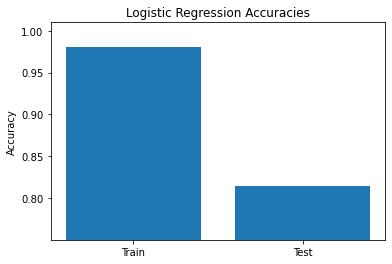

In [37]:
#Plot model accuracies
fig, ax = plt.subplots()
xs = np.array(list(range(2)))
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1.01])
ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])
ax.set_title('Logistic Regression Accuracies')
ax.set_xticks(xs)
ax.set_xticklabels(['Train', 'Test'])
ax.bar(xs,[acc_train, acc_test])

In [38]:
#Get a validation split of the treaining data
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train,y_train,test_size=0.25, random_state=1)

In [39]:
#Peform regularization strength grid search using validation split
for c in [10.0, 1.0, 0.1, 0.01, 0.001]:
    print(c)
    model_val = LogisticRegression(penalty='l2', C=c)
    model_val.fit(X_train_val,y_train_val)
    preds_train_val = model_val.predict(X_train_val)
    acc_train_val = (preds_train_val == y_train_val).mean()
    print('Acc_train_val: '+str(acc_train_val))
    preds_test = model_val.predict(X_test_val)
    acc_test_val = (preds_test == y_test_val).mean()
    print('Acc_test_val: '+str(acc_test_val))

10.0
Acc_train_val: 0.9736842105263158
Acc_test_val: 0.7692307692307693
1.0
Acc_train_val: 0.9736842105263158
Acc_test_val: 0.7692307692307693
0.1
Acc_train_val: 0.9210526315789473
Acc_test_val: 0.9230769230769231
0.01
Acc_train_val: 0.9210526315789473
Acc_test_val: 0.8461538461538461
0.001
Acc_train_val: 0.7894736842105263
Acc_test_val: 0.7692307692307693


In [40]:
#Train and test regularized model
model_l2 = LogisticRegression(penalty='l2', C=0.1)
model_l2.fit(X_train,y_train)
preds_train_l2 = model_l2.predict(X_train)
acc_train_l2 = (preds_train_l2 == np.squeeze(y_train)).mean()
print('Acc_train_val: '+str(acc_train_l2))
preds_test_l2 = model_l2.predict(X_test)
acc_test_l2 = (preds_test_l2 == y_test).mean()
print('Acc_test_val: '+str(acc_test_l2))

Acc_train_val: 0.9411764705882353
Acc_test_val: 0.9321526468243939


<BarContainer object of 4 artists>

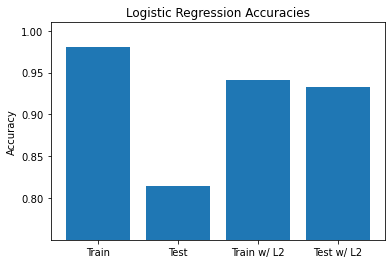

In [28]:
#Plot unregularized and regularized model accuracies
fig, ax = plt.subplots()
xs = np.array(list(range(4)))
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1.01])
ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])
ax.set_title('Logistic Regression Accuracies')
ax.set_xticks(xs)
ax.set_xticklabels(['Train', 'Test', 'Train w/ L2', 'Test w/ L2'])
ax.bar(xs,[acc_train, acc_test, acc_train_l2, acc_test_l2])

<BarContainer object of 20 artists>

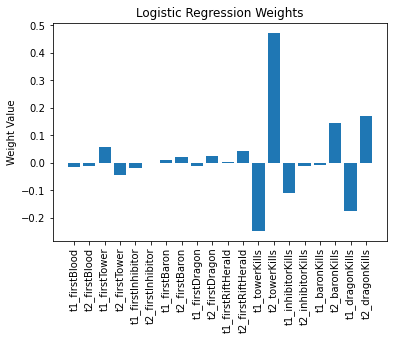

In [29]:
#Plot input feature weights
fig, ax = plt.subplots()
xs = np.array(list(range(len(objectives))))
ax.set_ylabel('Weight Value')
ax.set_title('Logistic Regression Weights')
ax.set_xticks(xs)
ax.set_xticklabels(objectives,rotation = 90)
ax.bar(xs,np.squeeze(model_l2.coef_))
